In [46]:
# The usual preamble
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.patches as mpatches
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from mpl_toolkits.axes_grid1 import make_axes_locatable

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import calmap

# Pour avoir de belles courbes
%matplotlib inline
plt.rcParams['figure.figsize'] = (17, 10)
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

In [47]:
dateparse = lambda x: pd.datetime.strptime(x, '%d/%m/%Y')
df = pd.read_csv('./activity_2020.csv',parse_dates=['date'],date_parser=dateparse,index_col=['date'],delimiter=';')

In [48]:
# first value : the text that we search in the csv file
# second value : the corresponding score
conf = [['Leave', 1],
        ['Imposed leave', 2],
        ['Public holiday', 3],
        ['Week-end', 4],
        ['Sick Leave', 5],
        ['Home Office', 8],
        ['@ Office', 10]         
       ]

In [49]:
df['score'] = ""
df['score'] = np.where(df['activité'].isna(), 0, df['score'])
df['score'] = np.where(df['activité'] == conf[0][0], conf[0][1], df['score'])
df['score'] = np.where(df['activité'] == conf[1][0], conf[1][1], df['score'])
df['score'] = np.where(df['activité'] == conf[2][0], conf[2][1], df['score'])
df['score'] = np.where(df['activité'] == conf[3][0], conf[3][1], df['score'])
df['score'] = np.where(df['activité'] == conf[4][0], conf[4][1], df['score'])
df['score'] = np.where(df['activité'] == conf[5][0], conf[5][1], df['score'])
df['score'] = np.where(df['activité'] == conf[6][0], conf[6][1], df['score'])

In [50]:
df['score'];

Text(0.5,1,'My 2020 work year')

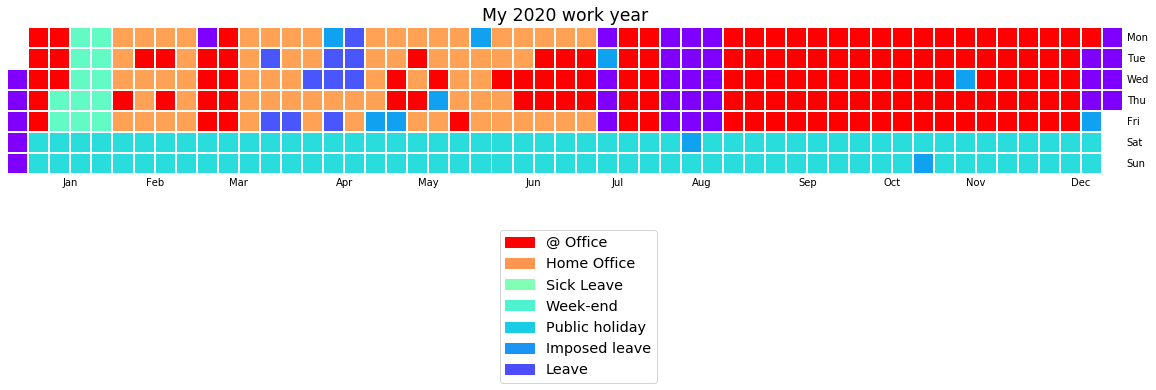

In [51]:
cmap = cm.rainbow
norm = Normalize(vmin=0, vmax=10)

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)
cax = calmap.yearplot(df['score'], ax=ax, cmap=cmap)


red_patch =  mpatches.Patch(color=cmap(norm(conf[6][1])), label=conf[6][0])
ora_patch =  mpatches.Patch(color=cmap(norm(conf[5][1])), label=conf[5][0])
gre_patch =  mpatches.Patch(color=cmap(norm(conf[4][1])), label=conf[4][0])
lbl_patch =  mpatches.Patch(color=cmap(norm(conf[3][1])), label=conf[3][0])
blu_patch =  mpatches.Patch(color=cmap(norm(conf[2][1])), label=conf[2][0])
dbl_patch =  mpatches.Patch(color=cmap(norm(conf[1][1])), label=conf[1][0])
pur_patch =  mpatches.Patch(color=cmap(norm(conf[0][1])), label=conf[0][0])

fig.legend(handles=[red_patch,
                    ora_patch,
                    gre_patch,
                    lbl_patch,
                    blu_patch,
                    dbl_patch,
                    pur_patch],
           loc='lower center',
           fontsize='x-large')
plt.title('My 2020 work year',fontsize='xx-large')